# 7.2 Exercise: Titanic Case Study Part 2
author: Rachel Nelson

class: DSC550-T302 Data Mining (2215-1)

# Titanic Tutorial Part 2
###  Feature and Dimensionality Reduction

* There features we will get rid of are:  "PassengerId", "Name", "Ticket" and "Cabin".

* We can also fill in missing values.
    Age has some missing values so I’ll fill in with the average age.
    Embarked also has some missing so I’ll the most common.

* Log Transformation on fare

* Convert your categorical data into numbers (Sex, PClass, Embark)


In [34]:
import pandas as pd
import yellowbrick
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
#Step 1:  Load data into a dataframe
addr1 = "C:/Users/emera/Downloads/week-6/week-6/train.csv"
data = pd.read_csv(addr1)

In [36]:
# drop features
data =  data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [37]:
# Fill in missing values with average age
def fill_avg(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)

# Run the function
fill_avg(data['Age'])

# Review Results
print(data.describe())

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [38]:
# Fill in Embarked with most common value
def fill_common(data, inplace=True):
    return data.fillna('S', inplace=inplace)

# Run the function
fill_common(data['Embarked'])

# Review Results
print(data.describe())

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


Text(0, 0.5, 'Count')

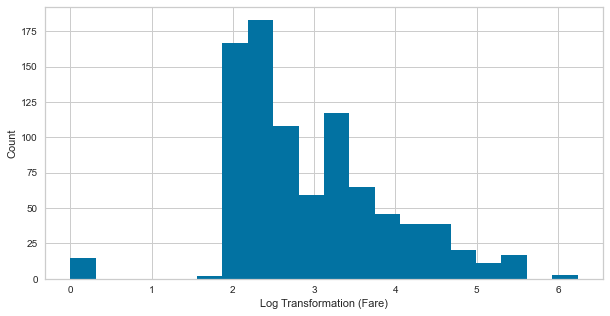

In [39]:
# Log Transformation on fare
def log_trans(data):
    return data.apply(np.log1p)

# Run the function
data['Fare_log1p'] = log_trans(data['Fare'])

# Review Results
plt.hist(data['Fare_log1p'], bins=20)
plt.xlabel('Log Transformation (Fare)')
plt.ylabel('Count')

In [40]:
# Convert your categorical data into numbers (Sex, PClass, Embark)
features = ['Pclass', 'Sex', "Embarked"]
df = data[features]
df = data.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})

# One Hot Encoding
df = pd.get_dummies(df)

# check the data
print(df.head(8))

   Survived   Age  SibSp  Parch     Fare  Fare_log1p  Pclass_1st  Pclass_2nd  \
0         0  22.0      1      0   7.2500    2.110213           0           0   
1         1  38.0      1      0  71.2833    4.280593           1           0   
2         1  26.0      0      0   7.9250    2.188856           0           0   
3         1  35.0      1      0  53.1000    3.990834           1           0   
4         0  35.0      0      0   8.0500    2.202765           0           0   
5         0  28.0      0      0   8.4583    2.246893           0           0   
6         0  54.0      0      0  51.8625    3.967694           1           0   
7         0   2.0      3      1  21.0750    3.094446           0           0   

   Pclass_3rd  Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0           1           0         1           0           0           1  
1           0           1         0           1           0           0  
2           1           1         0           0          